<a href="https://colab.research.google.com/github/therealfortune/tensorflow-fortune/blob/master/HorseAndHumansConv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download the zip file

In [1]:
!gdown --id 1onaG42NZft3wCE1WH0GDEbUhu75fedP5

Downloading...
From: https://drive.google.com/uc?id=1onaG42NZft3wCE1WH0GDEbUhu75fedP5
To: /content/horse-or-human.zip
100% 150M/150M [00:01<00:00, 95.0MB/s]


In [2]:
import os
import zipfile
# Load the zip file
local_zip = "./horse-or-human.zip"
zip_ref = zipfile.ZipFile(local_zip ,'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

Train Set Directories

In [40]:
# Directory with our training horse pictures
train_horse_dir = os.path.join("./horse-or-human/horses")

# Directory with our training human pictures
train_human_dir = os.path.join("./horse-or-human/humans")

In [41]:
print("total training horse images:" ,len(os.listdir(train_horse_dir)))
print("total training human images:" ,len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [42]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse01-6.png', 'horse16-3.png', 'horse44-1.png', 'horse39-6.png', 'horse02-4.png', 'horse01-5.png', 'horse12-7.png', 'horse20-8.png', 'horse15-9.png', 'horse15-1.png']
['human15-30.png', 'human10-10.png', 'human04-30.png', 'human03-21.png', 'human17-24.png', 'human13-26.png', 'human01-02.png', 'human07-07.png', 'human07-03.png', 'human04-06.png']


In [43]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg 

# Parameters for our graph , we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for interacting over images
pic_index = 0

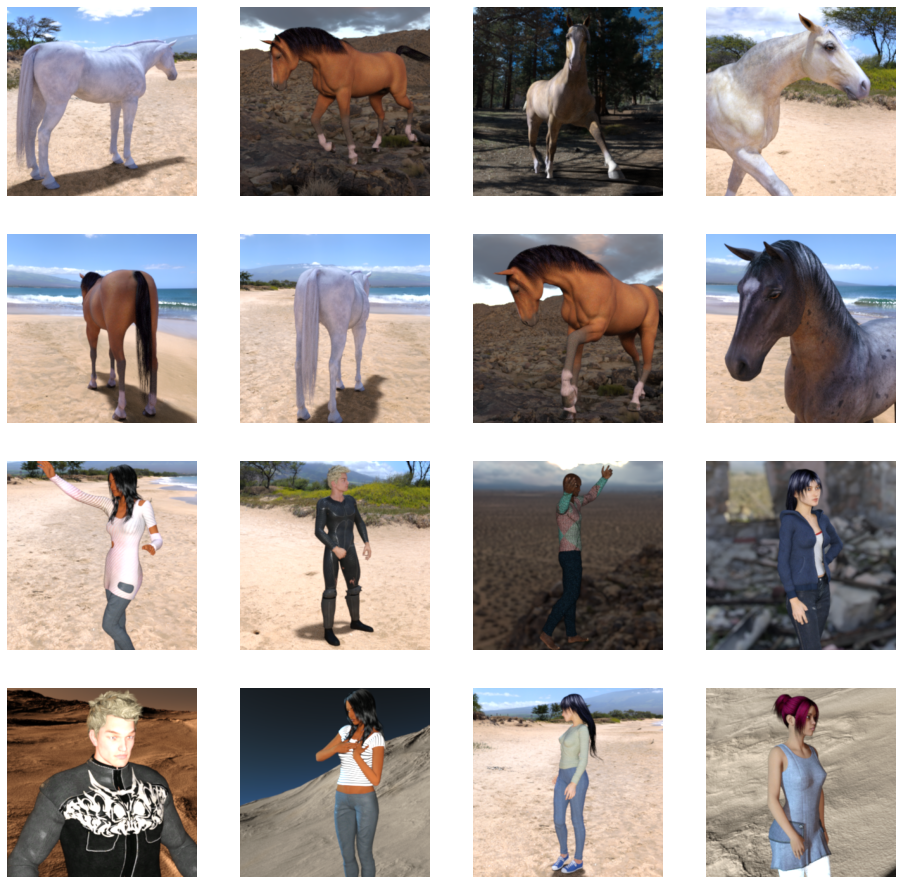

In [44]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [45]:
import tensorflow as tf

In [46]:
model = tf.keras.models.Sequential([
  # The desired size of RGB image is 300x300
  tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(300,300,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation="relu"),
  # Only 1 output neuron. It will contain a value from 0-1 where 0 for 
  tf.keras.layers.Dense(1, activation="sigmoid")                            
])

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 149, 149, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 35, 35, 64)      

In [48]:
# RMSprop is used instead of adam to enable us adjust our learning rate
# Binary crossentropy is used because it is a binary classifier
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss="binary_crossentropy",
              metrics=['accuracy']
              )

In [50]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be resized to 1./255
train_detagan = ImageDataGenerator(rescale=1/255)
# Flow training images in batches of 128 using train_datagen generator
train_generator = train_detagan.flow_from_directory(
    './horse-or-human/', # Source directory for training images
    target_size=(300,300), # All images will be resized to 150x150
    batch_size = 128,
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.


In [51]:
history = model.fit(
    train_generator,
    epochs=15,
    steps_per_epoch = 8,
    verbose=1
)

Epoch 1/15
8/8 [==============================] - 94s 11s/step - loss: 0.7210 - accuracy: 0.5088
Epoch 2/15
8/8 [==============================] - 78s 9s/step - loss: 1.3868 - accuracy: 0.6685
Epoch 3/15
8/8 [==============================] - 77s 9s/step - loss: 0.4235 - accuracy: 0.8454
Epoch 4/15
8/8 [==============================] - 78s 10s/step - loss: 0.7764 - accuracy: 0.8465
Epoch 5/15
8/8 [==============================] - 77s 9s/step - loss: 0.5167 - accuracy: 0.8665
Epoch 6/15
8/8 [==============================] - 78s 9s/step - loss: 0.1063 - accuracy: 0.9644
Epoch 7/15
8/8 [==============================] - 78s 9s/step - loss: 0.1707 - accuracy: 0.9355
Epoch 8/15
8/8 [==============================] - 83s 10s/step - loss: 0.1333 - accuracy: 0.9577
Epoch 9/15
8/8 [==============================] - 79s 10s/step - loss: 0.0295 - accuracy: 0.9900
Epoch 10/15
8/8 [==============================] - 78s 9s/step - loss: 0.0131 - accuracy: 0.9967
Epoch 11/15
8/8 [==================

UPLOADING TEST IMAGES FOR PREDICTION

In [52]:
import numpy as np 
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + ' is a human')
  else:
    print(fn + ' is a horse')


Saving bey.jpg to bey (1).jpg
[1.]
bey.jpg is a human


Visualizing Intermediate Representations

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


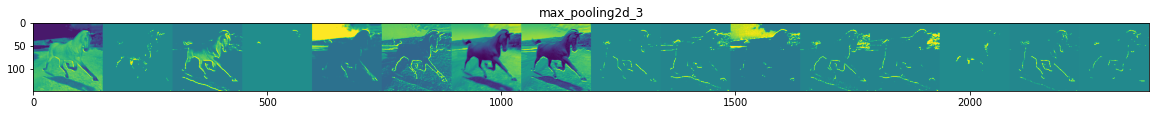

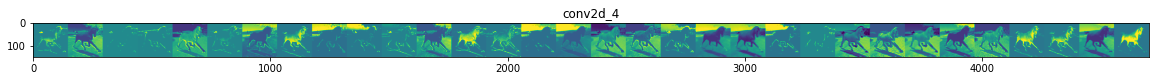

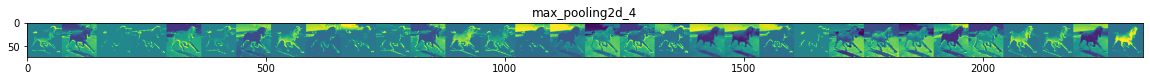

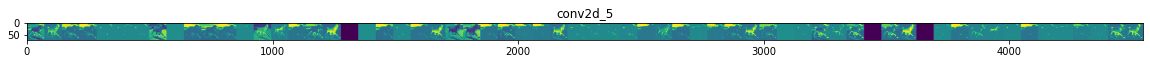

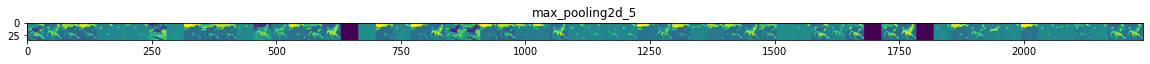

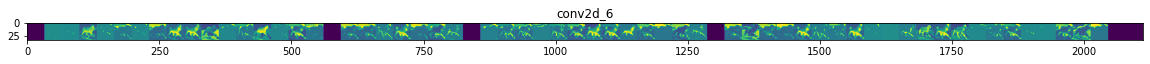

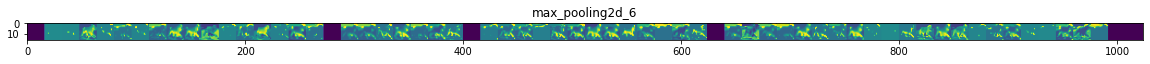

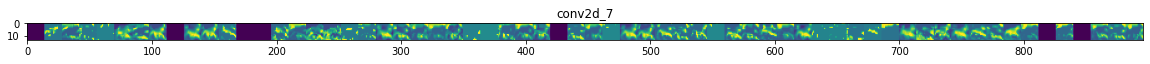

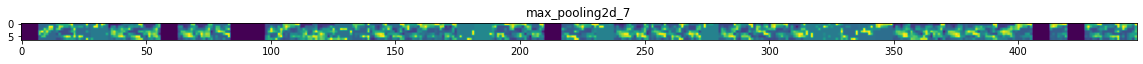

In [53]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')